<a href="https://colab.research.google.com/github/kaneezfatima11/IDS568_mlops_MS00/blob/main/Assignment1_Q5_Q7_Q8_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**#Question 5: Feedforward Neural Networks**  
 reference of each sub question as well as the deliverables is given in the respective code chunk to ensure that the subquestions as well the deliverables are submitted in the required manner.

**Q5a- Build the above classifiers using Keras and TensorFlow and solve the classification problem for MNIST/Fashion MNIST**


In [41]:
#SETUP, DATA IMPORT AND DATA NORMALIZATION
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

tf.random.set_seed(42)
np.random.seed(42)

# Load data
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize
train_images = train_images.astype("float32") / 255.0
test_images  = test_images.astype("float32") / 255.0

print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)



(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


**Q5a.Approach** We compared ReLU and Leaky ReLU activation functions using the same feedforward neural network architecture. Both activations achieved similar validation and test accuracy, indicating that ReLU is already effective for this task. Leaky ReLU showed a marginal improvement in performance, likely due to its ability to maintain small gradients for negative activations and reduce the risk of dead neurons. However, the difference is minimal, suggesting that for shallow networks on Fashion MNIST, standard ReLU is sufficient and computationally simpler.

In [43]:
# MODEL DEVELOPMENT ACTIVATION FUNCTION RELU and Leaky RELU
## A common FFN that differ only in the activation fucntion
### a. Reluf(x;W1​,b1​,W2​,b2​)=W2​max(0,W1​x+b1​)+b2​
####b. Leaky ReLU
def build_ffn(hidden_units=128, activation="relu", alpha=0.01):
    layers = [tf.keras.layers.Flatten(input_shape=(28, 28)),
              tf.keras.layers.Dense(hidden_units)]

    if activation == "relu":
        layers.append(tf.keras.layers.ReLU())

    elif activation == "leaky_relu":
        layers.append(tf.keras.layers.LeakyReLU(alpha=alpha))
    else:
        raise ValueError("activation must be 'relu' or 'leaky_relu'")

    layers.append(tf.keras.layers.Dense(10, activation="softmax"))
    return tf.keras.Sequential(layers)


In [44]:

## Deliverable 1: Keras model definitions for both ReLU and Leaky ReLU architectures
# Seprate architecture of FFN for Relu and Leaky ReLU will look like this.

model_relu = build_ffn(hidden_units=128, activation="relu")
model_leaky_relu = build_ffn(hidden_units=128, activation="leaky_relu")

print("ReLU model:")
model_relu.summary()

print("\nLeaky ReLU model:")
model_leaky_relu.summary()



ReLU model:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_30 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_23 (ReLU)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)


Leaky ReLU model:


Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_31 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
#MODEL TRAINING AND EVALUATION (Ref. Deliverable 2)
def train_and_evaluate(hidden_units, activation, optimizer, lr, batch_size=128, epochs=10):
    model = build_ffn(hidden_units=hidden_units, activation=activation)

    if optimizer == "sgd":
        opt = tf.keras.optimizers.SGD(learning_rate=lr)
    elif optimizer == "adam":
        opt = tf.keras.optimizers.Adam(learning_rate=lr)
    elif optimizer == "rmsprop":
        opt = tf.keras.optimizers.RMSprop(learning_rate=lr)
    else:
        raise ValueError("optimizer must be 'sgd', 'adam', or 'rmsprop'")

    model.compile(
        optimizer=opt,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=["accuracy"]
    )

    history = model.fit(
        train_images, train_labels,
        validation_split=0.1,
        epochs=epochs,
        batch_size=batch_size,
        verbose=0
    )

    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
    val_acc_end = history.history["val_accuracy"][-1]

    return {
        "hidden_units": hidden_units,
        "activation": activation,
        "optimizer": optimizer,
        "lr": lr,
        "batch_size": batch_size,
        "epochs": epochs,
        "val_acc_end": val_acc_end,
        "test_acc": test_acc,
        "history": history.history
    }


In [46]:
#OUTCOME ReLU and Leaky ReLU (Deliverable #3 Table comparing test accuracy: ReLU vs. Leaky ReLU)
relu_run = train_and_evaluate(hidden_units=128, activation="relu",
                              optimizer="adam", lr=1e-3, batch_size=128, epochs=10)
lrelu_run = train_and_evaluate(hidden_units=128, activation="leaky_relu",
                               optimizer="adam", lr=1e-3, batch_size=128, epochs=10)

df_act = pd.DataFrame([
    {"activation": "ReLU", "val_acc_end": relu_run["val_acc_end"], "test_acc": relu_run["test_acc"]},
    {"activation": "Leaky ReLU", "val_acc_end": lrelu_run["val_acc_end"], "test_acc": lrelu_run["test_acc"]}
])

df_act


,activation,val_acc_end,test_acc
0,ReLU,0.879500,0.8753
1,Leaky ReLU,0.883833,0.8765


In [47]:
#COMPARISION OF OPTIMIZERS SGD, ADAM and RMSprop (Deliverable#4 Table comparing optimizers: SGD vs. Adam vs. RMSprop (at minimum)
##hidden_units=128, activation=ReLU.
optimizer_configs = [
    ("sgd", 0.01),
    ("adam", 0.001),
    ("rmsprop", 0.001),
]

runs_opt = []
for opt, lr in optimizer_configs:
    runs_opt.append(train_and_evaluate(hidden_units=128, activation="relu",
                                       optimizer=opt, lr=lr, batch_size=128, epochs=10))

df_opt = pd.DataFrame([{
    "optimizer": r["optimizer"],
    "lr": r["lr"],
    "val_acc_end": r["val_acc_end"],
    "test_acc": r["test_acc"]
} for r in runs_opt])

df_opt.sort_values("test_acc", ascending=False)



/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


,optimizer,lr,val_acc_end,test_acc
1,adam,0.001,0.882333,0.8790
2,rmsprop,0.001,0.887667,0.8775
0,sgd,0.010,0.833333,0.8279


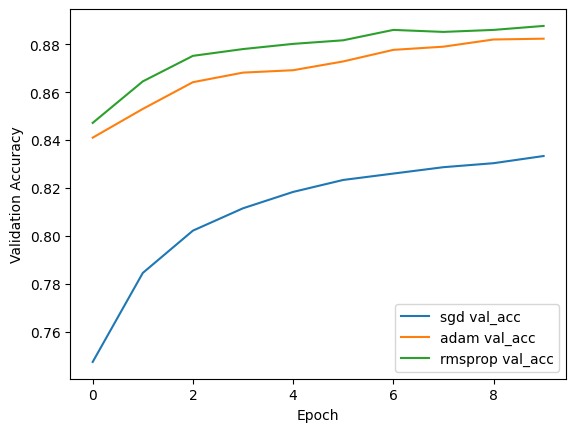

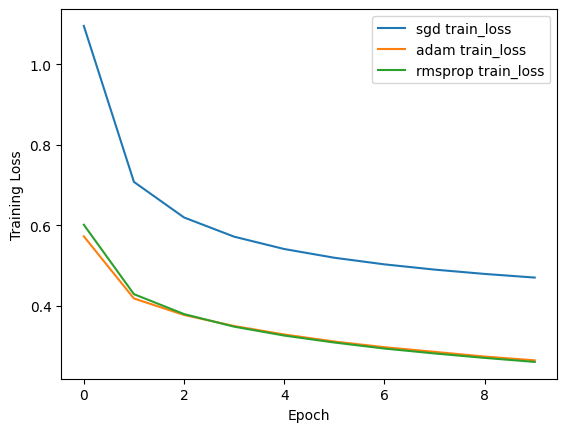

In [48]:
#COMPARIRION OF OUTCOMES i.e TRAINING AND VALIDATION CURVES FOR EACH OPTIMIZER (Deliverable#2 Training code with training/validation curves)
plt.figure()
for r in runs_opt:
    plt.plot(r["history"]["val_accuracy"], label=f'{r["optimizer"]} val_acc')
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

plt.figure()
for r in runs_opt:
    plt.plot(r["history"]["loss"], label=f'{r["optimizer"]} train_loss')
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend()
plt.show()


In [49]:
## Deliverable Hidden size sweep table + loss curves (Deliverable#5 Table showing performance vs. hidden layer size (test at least 4 sizes: 16, 64, 256, 1024))

hidden_sizes = [16, 64, 256, 1024]

runs_h = []
for h in hidden_sizes:
    runs_h.append(train_and_evaluate(hidden_units=h, activation="relu",
                                     optimizer="adam", lr=1e-3, batch_size=128, epochs=10))

df_h = pd.DataFrame([{
    "hidden_units": r["hidden_units"],
    "val_acc_end": r["val_acc_end"],
    "test_acc": r["test_acc"]
} for r in runs_h])

df_h.sort_values("hidden_units")



/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


,hidden_units,val_acc_end,test_acc
0,16,0.859667,0.8516
1,64,0.874167,0.8716
2,256,0.885167,0.8784
3,1024,0.883000,0.8759


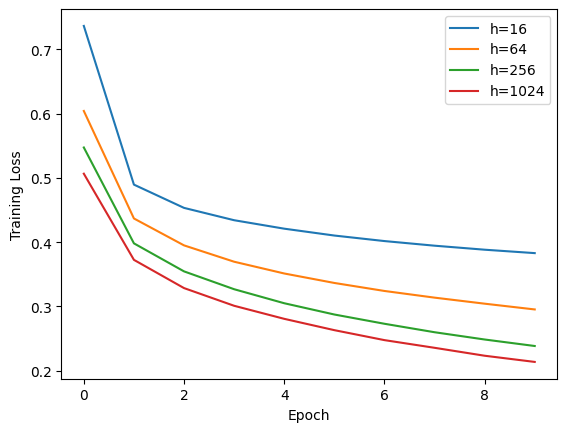

In [50]:
#TRAINING LOSS CURVES FOR HIDDEN LAYERS (Deliverable #6 Training loss curves for different hidden layer sizes)
plt.figure()
for r in runs_h:
    plt.plot(r["history"]["loss"], label=f'h={r["hidden_units"]}')
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend()
plt.show()


**Q5b Discuss how optimizer choice influences performance** (ref deliverable#7)

 As indicated in the lecture content:
 Training relies on gradient-based optimization which are computed via backpropagation. Parameters are updated iteratively to reduce loss. Different optimizers behave differently in convergence speed, sensitivity to learning rate stability during training.

 Optimizers determine how model parameters are updated using gradients computed via backpropagation.


1.   Adam - Highest validation and test accuracy,Fastest and most stable convergence. It performed best.
2.   RMSprop is slightly worsw than Adam. Its adaptive, but lacks Adams bias-correction and momentum combination i.e. less robust.

3.   SGD performed significantly worse. Its very sensitive to learning rate slower convergance with 10 epochs.

**Q5c What happens when the number of hidden units chosen is much smaller Similarly, what happens when the number of hidden units chosen is much higher** (ref Deliverable#7)

 The number of hidden units controls the capacity of the neural network, and choosing an appropriate size involves balancing underfitting and overfitting, consistent with the bias–variance tradeoff.

  With a small hidden layer e.g., 16 units, the network underfits the data and achieves lower accuracy. Increasing the hidden size to 64 and 256 improves both validation and test accuracy, as the network can learn more expressive feature representations. However, further increasing the hidden layer size to 1024 results in only marginal performance gains, indicating diminishing returns. This demonstrates the tradeoff between model capacity and efficiency, where larger models may not significantly improve generalization.

Q#7 Optimizer Comparison Study
Conduct a systematic comparison of optimization algorithms on your feedforward neural network from Question 5

Q7a.Implement training loops with SGD (vanilla), SGD with momentum (0.9), Adam,
and RMSprop optimizers

In [57]:
#SETUP
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.astype("float32") / 255.0
test_images  = test_images.astype("float32") / 255.0


In [58]:
# Model architecture

def build_q7_model(hidden_units=256):
    # identical architecture across all optimizer runs
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(hidden_units),
        tf.keras.layers.ReLU(),
        tf.keras.layers.Dense(10, activation="softmax")
    ])
    return model


In [59]:
# Helper function for optimizer selection to implement training loops. It will build optimizer object based on optimizer name and learning rate.
## (ref sub questio 7a and foundation for deliverable #1)
def make_optimizer(name, lr):
    name = name.lower()
    if name == "sgd":
        return tf.keras.optimizers.SGD(learning_rate=lr)
    if name == "momentum":
        return tf.keras.optimizers.SGD(learning_rate=lr, momentum=0.9)
    if name == "adam":
        return tf.keras.optimizers.Adam(learning_rate=lr)
    if name == "rmsprop":
        return tf.keras.optimizers.RMSprop(learning_rate=lr)
    raise ValueError("optimizer must be: sgd, momentum, adam, rmsprop")

def run_optimizer_experiment(optimizer_name, lr, hidden_units=256, batch_size=128, epochs=20):
    tf.random.set_seed(SEED)
    np.random.seed(SEED)

    model = build_q7_model(hidden_units=hidden_units)
    opt = make_optimizer(optimizer_name, lr)

    model.compile(
        optimizer=opt,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=["accuracy"]
    )

    hist = model.fit(
        train_images, train_labels,
        validation_split=0.1,
        epochs=epochs,
        batch_size=batch_size,
        verbose=0
    )

    history = hist.history
    return {
        "optimizer": optimizer_name,
        "lr": lr,
        "hidden_units": hidden_units,
        "batch_size": batch_size,
        "epochs": epochs,
        "train_loss": history["loss"],
        "val_acc": history["val_accuracy"],
        "final_val_acc": history["val_accuracy"][-1]
    }


In [60]:
# Executing Optimizers (Deliverable #1 Training code for all optimizers)
base_runs = []
base_runs.append(run_optimizer_experiment("sgd", lr=0.01))
base_runs.append(run_optimizer_experiment("momentum", lr=0.01))
base_runs.append(run_optimizer_experiment("adam", lr=0.001))
base_runs.append(run_optimizer_experiment("rmsprop", lr=0.001))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


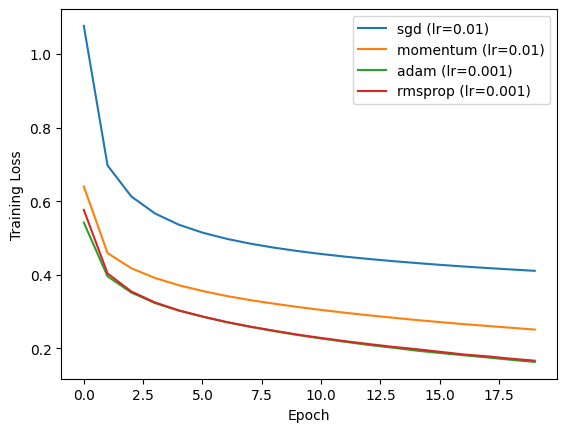

In [61]:
# TRAINING LOSS COMPARISION Deliverable #2 Combined plot: Training loss vs. epoch for all optimizers
plt.figure()
for r in base_runs:
    plt.plot(r["train_loss"], label=f'{r["optimizer"]} (lr={r["lr"]})')
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend()
plt.show()


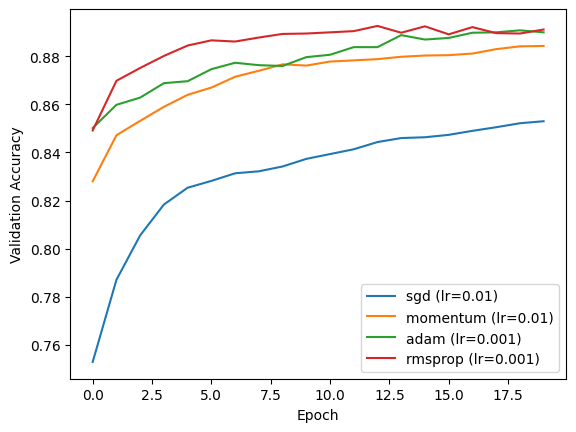

In [62]:
# VALIDATION  ACCURACY (Ref. deliverable #3 Validation accuracy vs. epoch for all optimizers)
plt.figure()
for r in base_runs:
    plt.plot(r["val_acc"], label=f'{r["optimizer"]} (lr={r["lr"]})')
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()



**Q7b For each optimizer, plot the training loss and validation accuracy over epochs on the same figure.**

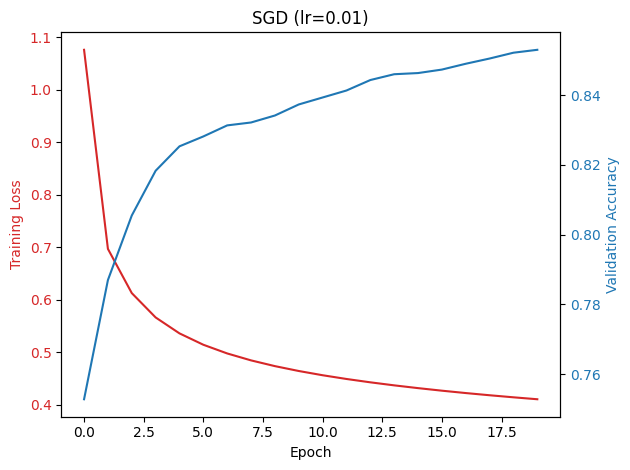

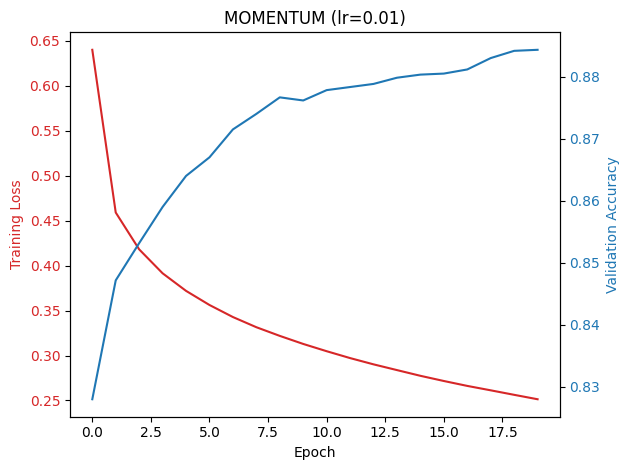

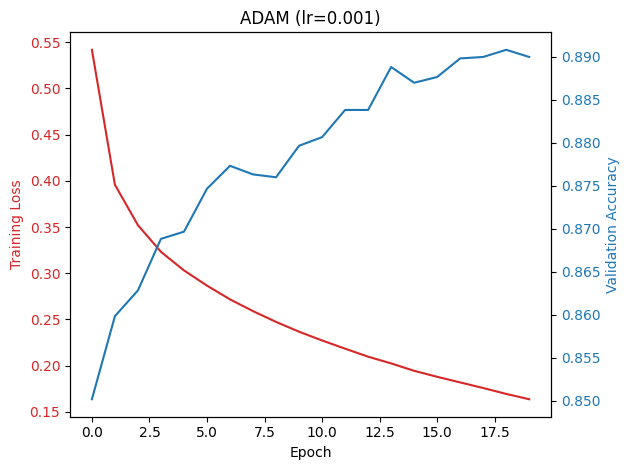

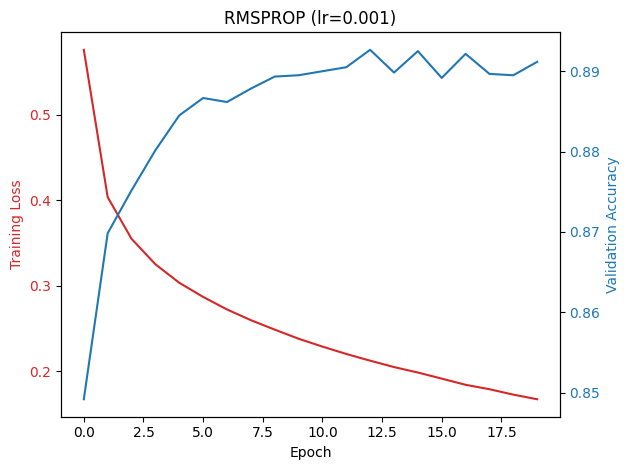

In [63]:
## COMBINED COMPARISION PLOTS (Ref Q7b )

for r in base_runs:
    fig, ax1 = plt.subplots()

    # Training loss (left y-axis)
    ax1.plot(r["train_loss"], color="tab:red", label="Training Loss")
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Training Loss", color="tab:red")
    ax1.tick_params(axis="y", labelcolor="tab:red")

    # Validation accuracy (right y-axis)
    ax2 = ax1.twinx()
    ax2.plot(r["val_acc"], color="tab:blue", label="Validation Accuracy")
    ax2.set_ylabel("Validation Accuracy", color="tab:blue")
    ax2.tick_params(axis="y", labelcolor="tab:blue")

    plt.title(f"{r['optimizer'].upper()} (lr={r['lr']})")
    fig.tight_layout()
    plt.show()


**Q7c.Compare convergence speed: How many epochs does each optimizer require to reach 85% validation accuracy?**

In [64]:
# Epochs to reach 85 table (ref deliverable Table: Epochs to reach 85% accuracy (or "Did not reach" if applicable)

def epoch_to_reach(val_acc_list, threshold=0.85):
    for i, v in enumerate(val_acc_list, start=1):  # epochs are 1-indexed
        if v >= threshold:
            return i
    return "Did not reach"

df_85 = pd.DataFrame([{
    "optimizer": r["optimizer"],
    "lr": r["lr"],
    "epoch_to_85_val_acc": epoch_to_reach(r["val_acc"], 0.85)
} for r in base_runs])

df_85


,optimizer,lr,epoch_to_85_val_acc
0,sgd,0.010,18
1,momentum,0.010,3
2,adam,0.001,1
3,rmsprop,0.001,2


**Q7d.Compare final performance: What is the best validation accuracy achieved by each optimizer after 20 epochs?**

In [65]:
# final val accuracy after 20 epochs table (ref deliverable #5 Table: Final validation accuracy after 20 epochs )
df_final = pd.DataFrame([{
    "optimizer": r["optimizer"],
    "lr": r["lr"],
    "final_val_acc_20epochs": r["final_val_acc"]
} for r in base_runs]).sort_values("final_val_acc_20epochs", ascending=False)

df_final


,optimizer,lr,final_val_acc_20epochs
3,rmsprop,0.001,0.891167
2,adam,0.001,0.890000
1,momentum,0.010,0.884333
0,sgd,0.010,0.853000


**Q7e Discuss the trade-offs between the optimizers in terms of convergence speed final accuracy, and sensitivity to learning rate.**

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


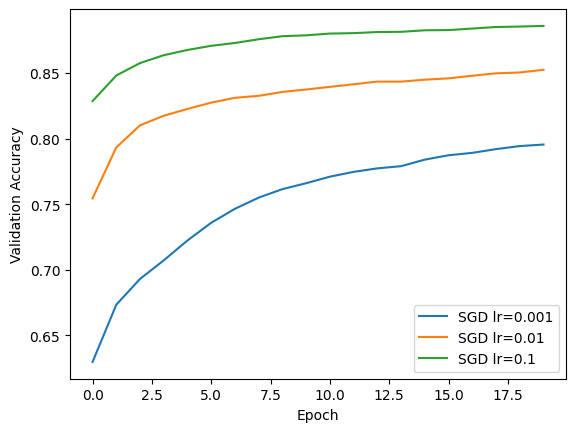

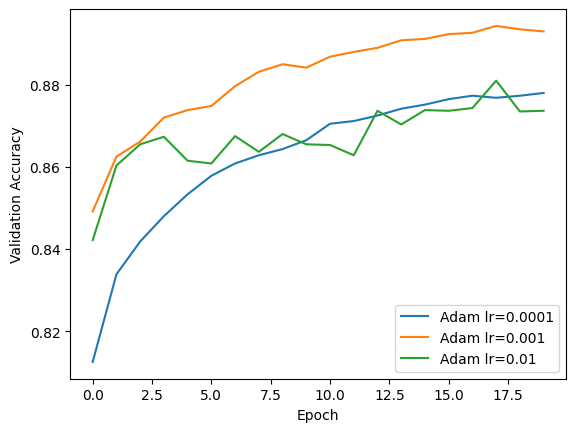

In [70]:

#Learning Rate Sensitivity Analysis (ref. deliverable # 6 Learning rate sensitivity analysis for SGD vs. Adam (test 3 learning rates each)


sgd_lrs = [0.001, 0.01, 0.1]
adam_lrs = [0.0001, 0.001, 0.01]
lr_runs = []

for lr in sgd_lrs:
    lr_runs.append(run_optimizer_experiment("sgd", lr=lr))

for lr in adam_lrs:
    lr_runs.append(run_optimizer_experiment("adam", lr=lr))

df_lr = pd.DataFrame([{
    "optimizer": r["optimizer"],
    "lr": r["lr"],
    "epoch_to_85_val_acc": epoch_to_reach(r["val_acc"], 0.85),
    "final_val_acc_20epochs": r["final_val_acc"]
} for r in lr_runs]).sort_values(["optimizer", "lr"])

df_lr

# SGD LR sensitivity plot
plt.figure()
for r in lr_runs:
    if r["optimizer"] == "sgd":
        plt.plot(r["val_acc"], label=f'SGD lr={r["lr"]}')
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

# Adam LR sensitivity plot
plt.figure()
for r in lr_runs:
    if r["optimizer"] == "adam":
        plt.plot(r["val_acc"], label=f'Adam lr={r["lr"]}')
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()



**Trade-offs between the optimizers in terms of convergence speed, final accuracy, and sensitivity to learning rate.**

Across the four optimizers, clear differences can be observed in convergence speed, final performance, and sensitivity to learning rate. Adam and RMSprop converge the fastest, reaching 85% validation accuracy within 1–2 epochs, whereas SGD with momentum requires several epochs and vanilla SGD takes significantly longer (18 epochs) to reach the same threshold. In terms of final validation accuracy after 20 epochs, RMSprop achieves the highest performance (Approx. 0.891), closely followed by Adam (approx 0.890), while momentum-based SGD performs moderately well and vanilla SGD lags behind. The learning-rate sensitivity analysis shows that SGD is highly sensitive to the choice of learning rate, with small learning rates converging very slowly and larger rates required for reasonable performance. In contrast, Adam is more robust across learning rates, maintaining stable convergence even when the learning rate varies by orders of magnitude. Overall, adaptive optimizers such as Adam and RMSprop provide faster convergence and reduced sensitivity to hyperparameter tuning, while SGD-based methods require careful learning-rate selection but can still perform competitively with momentum and sufficient training time.

**Q8 # GRADIENT FLOW ANALYSIS** - Analyze how gradients flow through your neural network during training.

**Q8a.For your 2-layer network from Question 5, record the gradient magnitudes (L2 norm) for each layer during training.**

In [71]:
#SET UP AND PREP (SEEDING, BATCHING)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.astype("float32") / 255.0
test_images  = test_images.astype("float32") / 255.0

BATCH_SIZE = 128
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_ds = train_ds.shuffle(60000, seed=SEED).batch(BATCH_SIZE)

NUM_STEPS = 100  # record at least 100 training steps (batches)


In [72]:
# MODEL BUILD FOR MULTIPLE LAYERS 2 VS 5 Layer usind Relu and Leaky ReLU
HIDDEN_UNITS = 256  # set to your Q5 hidden size if different

def build_2layer_model(activation="relu", alpha=0.01):
    layers = [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(HIDDEN_UNITS)
    ]
    if activation == "relu":
        layers.append(tf.keras.layers.ReLU())
    elif activation == "leaky_relu":
        layers.append(tf.keras.layers.LeakyReLU(alpha=alpha))
    else:
        raise ValueError("activation must be 'relu' or 'leaky_relu'")
    layers.append(tf.keras.layers.Dense(10, activation="softmax"))
    return tf.keras.Sequential(layers)

def build_5layer_model(activation="relu", alpha=0.01):
    layers = [tf.keras.layers.Flatten(input_shape=(28, 28))]
    for _ in range(4):  # 4 hidden layers total -> plus output = deeper net
        layers.append(tf.keras.layers.Dense(HIDDEN_UNITS))
        if activation == "relu":
            layers.append(tf.keras.layers.ReLU())
        else:
            layers.append(tf.keras.layers.LeakyReLU(alpha=alpha))
    layers.append(tf.keras.layers.Dense(10, activation="softmax"))
    return tf.keras.Sequential(layers)


In [74]:
# RECORDING GRADIENTS
## Specs: GradientTape used, L2/Frobenius via tf.norm, ≥100 steps
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

def grad_norms_for_steps(model, optimizer, dataset, num_steps=100):

    grad_log = []

    step = 0
    for x_batch, y_batch in dataset:
        if step >= num_steps:
            break

        with tf.GradientTape() as tape:
            preds = model(x_batch, training=True)
            loss = loss_fn(y_batch, preds)

        grads = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

        row = {"step": step, "loss": float(loss.numpy())}

        for var, g in zip(model.trainable_variables, grads):
            if g is None:
                continue

            row[var.name] = float(tf.norm(g).numpy())

        grad_log.append(row)
        step += 1

    return pd.DataFrame(grad_log)


In [75]:
# Gradient logging for 2 layer ReLU
tf.random.set_seed(SEED); np.random.seed(SEED)
model_relu_2 = build_2layer_model("relu")
opt = tf.keras.optimizers.Adam(learning_rate=1e-3)

df_relu_2 = grad_norms_for_steps(model_relu_2, opt, train_ds, num_steps=NUM_STEPS)
df_relu_2.head()

# Gradient logging for 2 layer Leaky ReLU
tf.random.set_seed(SEED); np.random.seed(SEED)
model_lrelu_2 = build_2layer_model("leaky_relu", alpha=0.01)
opt = tf.keras.optimizers.Adam(learning_rate=1e-3)

df_lrelu_2 = grad_norms_for_steps(model_lrelu_2, opt, train_ds, num_steps=NUM_STEPS)
df_lrelu_2.head()




/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


,step,loss,kernel,bias
0,0,2.632432,1.386412,0.192824
1,1,2.180246,0.956054,0.095490
2,2,2.086787,0.901420,0.163386
3,3,1.823087,1.021322,0.165854
4,4,1.608851,1.011922,0.131602


**Q8b.Plot the gradient magnitude for each layer vs. training step for the first 100 batches. (Deliverable plot for ReLU network)**

df_lrelu_2 shape: (100, 4)
Columns: ['step', 'loss', 'kernel', 'bias'] ... total: 4
Number of grad columns found: 2
Sample grad cols: ['kernel', 'bias']
Plotting 2 gradient curves


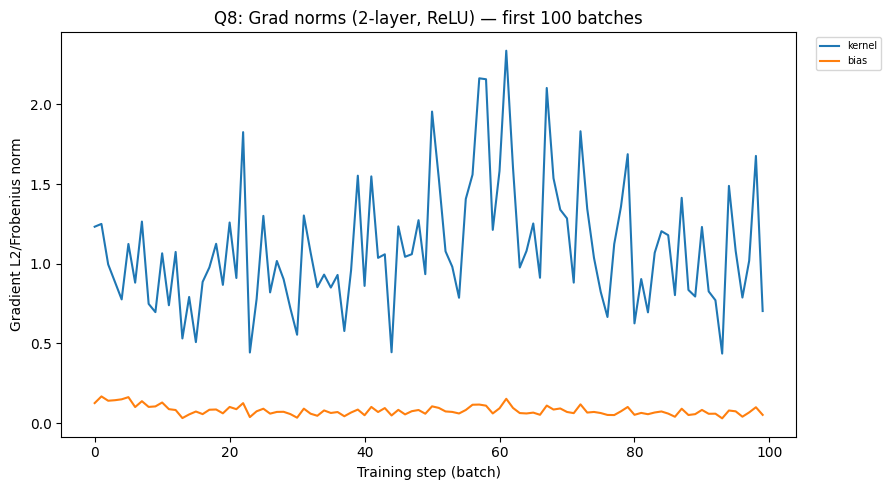

Plotting 2 gradient curves


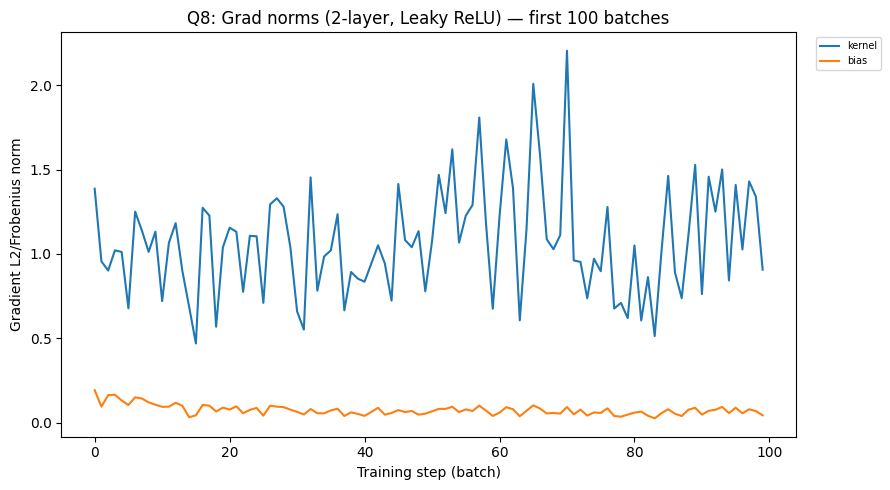

In [79]:
# Visualize gradient magnitude per layer and per step ReLU

print("df_lrelu_2 shape:", df_lrelu_2.shape)
print("Columns:", list(df_lrelu_2.columns)[:15], "... total:", len(df_lrelu_2.columns))

grad_cols = [c for c in df_lrelu_2.columns if ("kernel" in c or "bias" in c)]
print("Number of grad columns found:", len(grad_cols))
print("Sample grad cols:", grad_cols[:6])

def plot_gradients(df, title):
    grad_cols = [c for c in df.columns if ("kernel" in c or "bias" in c)]
    print("Plotting", len(grad_cols), "gradient curves")  # quick sanity check

    plt.figure(figsize=(9,5))
    for c in grad_cols:
        plt.plot(df["step"], df[c], label=c)

    plt.xlabel("Training step (batch)")
    plt.ylabel("Gradient L2/Frobenius norm")
    plt.title(title)
    plt.legend(fontsize=7, bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

plot_gradients(df_relu_2, "Q8: Grad norms (2-layer, ReLU) — first 100 batches")
plot_gradients(df_lrelu_2, "Q8: Grad norms (2-layer, Leaky ReLU) — first 100 batches")




**Q8c. Compare gradient flow between ReLU and Leaky ReLU activations. Which shows more stable gradients?**

Comparing gradient statistics across the first 100 steps, both ReLU and Leaky ReLU show similar average gradient magnitudes with no evidence of exploding gradients. However, Leaky ReLU produces slightly more stable weight (kernel) gradients, indicated by a lower coefficient of variation (std/mean), suggesting smoother gradient flow due to its non-zero slope for negative activations.

In [82]:
def gradient_stats(df):
    grad_cols = [c for c in df.columns if ("kernel" in c or "bias" in c)]

    if len(grad_cols) == 0:
        print("No gradient columns found. Available columns are:", df.columns.tolist()[:30], "...")
        return pd.DataFrame(columns=["variable","mean_norm","std_norm","cv_std_over_mean","min_norm","max_norm"])

    stats = []
    for c in grad_cols:
        vals = df[c].values.astype(float)
        stats.append({
            "variable": c,
            "mean_norm": float(np.mean(vals)),
            "std_norm": float(np.std(vals)),
            "cv_std_over_mean": float(np.std(vals) / (np.mean(vals) + 1e-12)),
            "min_norm": float(np.min(vals)),
            "max_norm": float(np.max(vals)),
        })
    return pd.DataFrame(stats)

# ---- run OUTSIDE the function ----
stats_relu_2 = gradient_stats(df_relu_2)
stats_lrelu_2 = gradient_stats(df_lrelu_2)

print("ReLU stats rows:", len(stats_relu_2), "columns:", stats_relu_2.columns.tolist())
print("Leaky ReLU stats rows:", len(stats_lrelu_2), "columns:", stats_lrelu_2.columns.tolist())

comp = stats_relu_2.merge(
    stats_lrelu_2,
    on="variable",
    how="outer",
    suffixes=("_relu", "_lrelu")
).sort_values("variable")

comp


ReLU stats rows: 2 columns: ['variable', 'mean_norm', 'std_norm', 'cv_std_over_mean', 'min_norm', 'max_norm']
Leaky ReLU stats rows: 2 columns: ['variable', 'mean_norm', 'std_norm', 'cv_std_over_mean', 'min_norm', 'max_norm']


,variable,mean_norm_relu,std_norm_relu,cv_std_over_mean_relu,min_norm_relu,max_norm_relu,mean_norm_lrelu,std_norm_lrelu,cv_std_over_mean_lrelu,min_norm_lrelu,max_norm_lrelu
0,bias,0.079288,0.029261,0.369046,0.029790,0.167380,0.075600,0.029768,0.393752,0.026031,0.192824
1,kernel,1.096063,0.390924,0.356662,0.436115,2.336652,1.068226,0.318808,0.298446,0.469595,2.203973


**Q8d. Increase in depth to 5 layers ReLU**

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Plotting 2 gradient curves


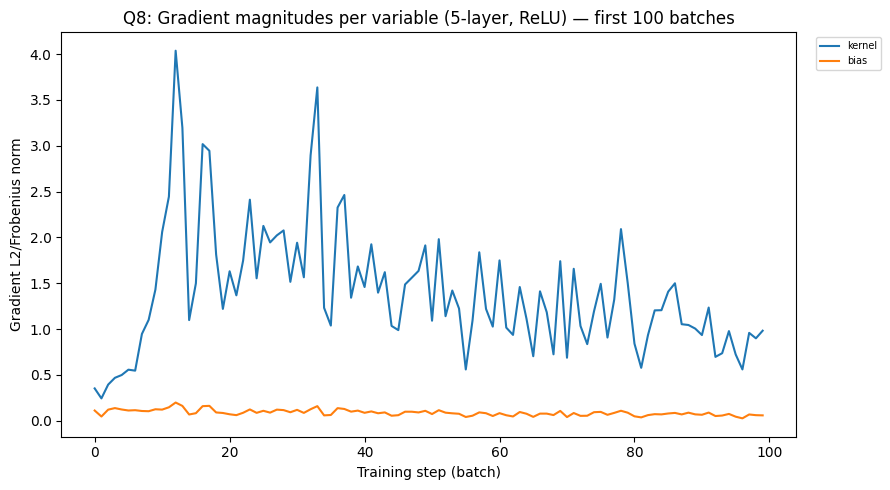

In [83]:
tf.random.set_seed(SEED); np.random.seed(SEED)
model_relu_5 = build_5layer_model("relu")
opt = tf.keras.optimizers.Adam(learning_rate=1e-3)

df_relu_5 = grad_norms_for_steps(model_relu_5, opt, train_ds, num_steps=NUM_STEPS)
df_relu_5.head()
plot_gradients(df_relu_5, "Q8: Gradient magnitudes per variable (5-layer, ReLU) — first 100 batches")


**Q8d. What happens to gradient magnitudes when you increase the network depth to 5 layers? (Add 3 more hidden layers with the same number of units)**


When the network depth is increased from 2 layers to 5 layers, the gradient magnitudes become more uneven across training steps, particularly for the weight (kernel) parameters. In the 5-layer ReLU network, kernel gradients exhibit larger fluctuations and occasional spikes early in training, followed by a gradual reduction in magnitude, indicating the onset of vanishing gradients in deeper layers. Bias gradients remain relatively small and stable, suggesting that most gradient instability occurs in the weight matrices. Compared to the shallower network, the deeper model shows less consistent gradient flow, making optimization more difficult. This behavior illustrates a common challenge in deep networks, where gradients can diminish or become unstable as they propagate through many layers, motivating the use of activation functions, normalization, or architectural techniques designed to stabilize gradient flow.